In [1]:
import pandas as pd
from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.decomposition import PCA
from bokeh.palettes import inferno
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('../datafiles/Thresholds/ppv_tracking_dataframe_v2.tsv.gz', sep='\t', decimal=',').fillna(0)
data_backup = data.copy(deep=True)
data.drop(columns='gene', inplace=True)

In [3]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)
print(f'Variance explained by the first 2 components: {pca.explained_variance_ratio_.sum()}')

Variance explained by the first 2 components: 0.9999936342154481


In [4]:
ap = AffinityPropagation(damping=0.9, max_iter=1000)
ap.fit(reduced_data)
apr = ap.predict(reduced_data)
ap_clusters = np.array(range(0, ap.cluster_centers_.shape[0]))
palette = inferno(ap_clusters.size)
ap_colormap = dict(zip(ap_clusters, palette))

In [5]:
kmean = KMeans(n_clusters=5, max_iter=1000)
kmean.fit(reduced_data)
kmeanr = kmean.predict(reduced_data)
kmean_clusters = np.array(range(0, kmean.cluster_centers_.shape[0]))
palette = inferno(kmean_clusters.size)
kmean_colormap = dict(zip(kmean_clusters, palette))

In [6]:
reduced_data = pd.DataFrame(reduced_data, columns=['pc1', 'pc2'])
reduced_data['pred_af'] = apr
reduced_data['pred_kmean'] = kmeanr


Cluster #0 standard deviation: 12.964519151387373 (n=44)
Cluster #1 standard deviation: 939.5198629182274 (n=1)
Cluster #2 standard deviation: 1129.9498753570492 (n=1)
Cluster #3 standard deviation: 565.6785518785522 (n=3)
Cluster #4 standard deviation: 38.32969917150852 (n=24)
Cluster #5 standard deviation: 218.9681165695716 (n=7)
Cluster #6 standard deviation: 99.01733015245097 (n=19)
Cluster #7 standard deviation: 188.6432475818571 (n=9)
Cluster #8 standard deviation: 250.7576630143094 (n=5)
Cluster #9 standard deviation: 350.153373538077 (n=3)
Cluster #10 standard deviation: 377.3676797736631 (n=4)
Cluster #11 standard deviation: 44.11572755794862 (n=211)
Cluster #12 standard deviation: 1662.7235691241258 (n=1)
Cluster #13 standard deviation: 57.78453328563514 (n=299)
Cluster #14 standard deviation: 430.2404531335877 (n=5)
Cluster #15 standard deviation: 299.79457720704863 (n=2)
Cluster #16 standard deviation: 37.784579966308925 (n=172)
Cluster #17 standard deviation: 73.4809750078

/tmp/ipykernel_3832/1165214732.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


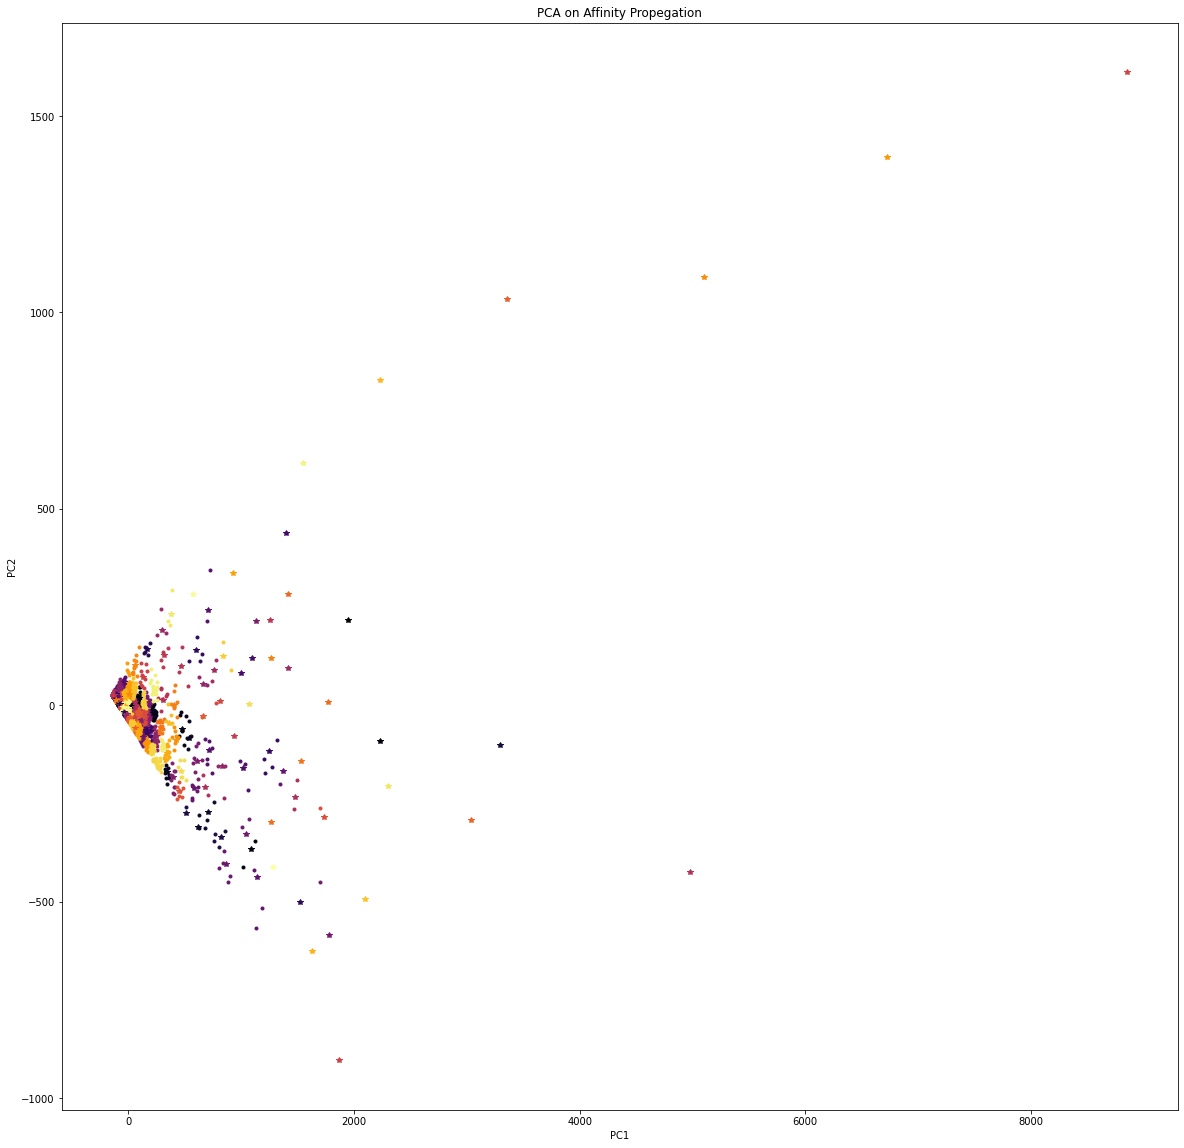

In [12]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set_title('PCA on Affinity Propegation')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
for cluster in ap_clusters:
    ax.plot(ap.cluster_centers_[cluster, 0], ap.cluster_centers_[cluster, 1], marker='*', color=ap_colormap[cluster])
    subset = reduced_data[reduced_data['pred_af'] == cluster]
    ax.scatter(subset.loc[:, 'pc1'], subset.loc[:, 'pc2'], marker='.', color=ap_colormap[cluster])
    print(f'Cluster #{cluster} standard deviation: {subset.stack().std()} (n={subset.shape[0]})')
fig.show()

Cluster #0 standard deviation: 60.14015332273194 (n=3104)
Cluster #1 standard deviation: 391.28140285177074 (n=115)
Cluster #2 standard deviation: 2891.1222674596634 (n=4)
Cluster #3 standard deviation: 102.54610900868373 (n=666)
Cluster #4 standard deviation: 904.4092749876505 (n=25)


/tmp/ipykernel_3832/552272545.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


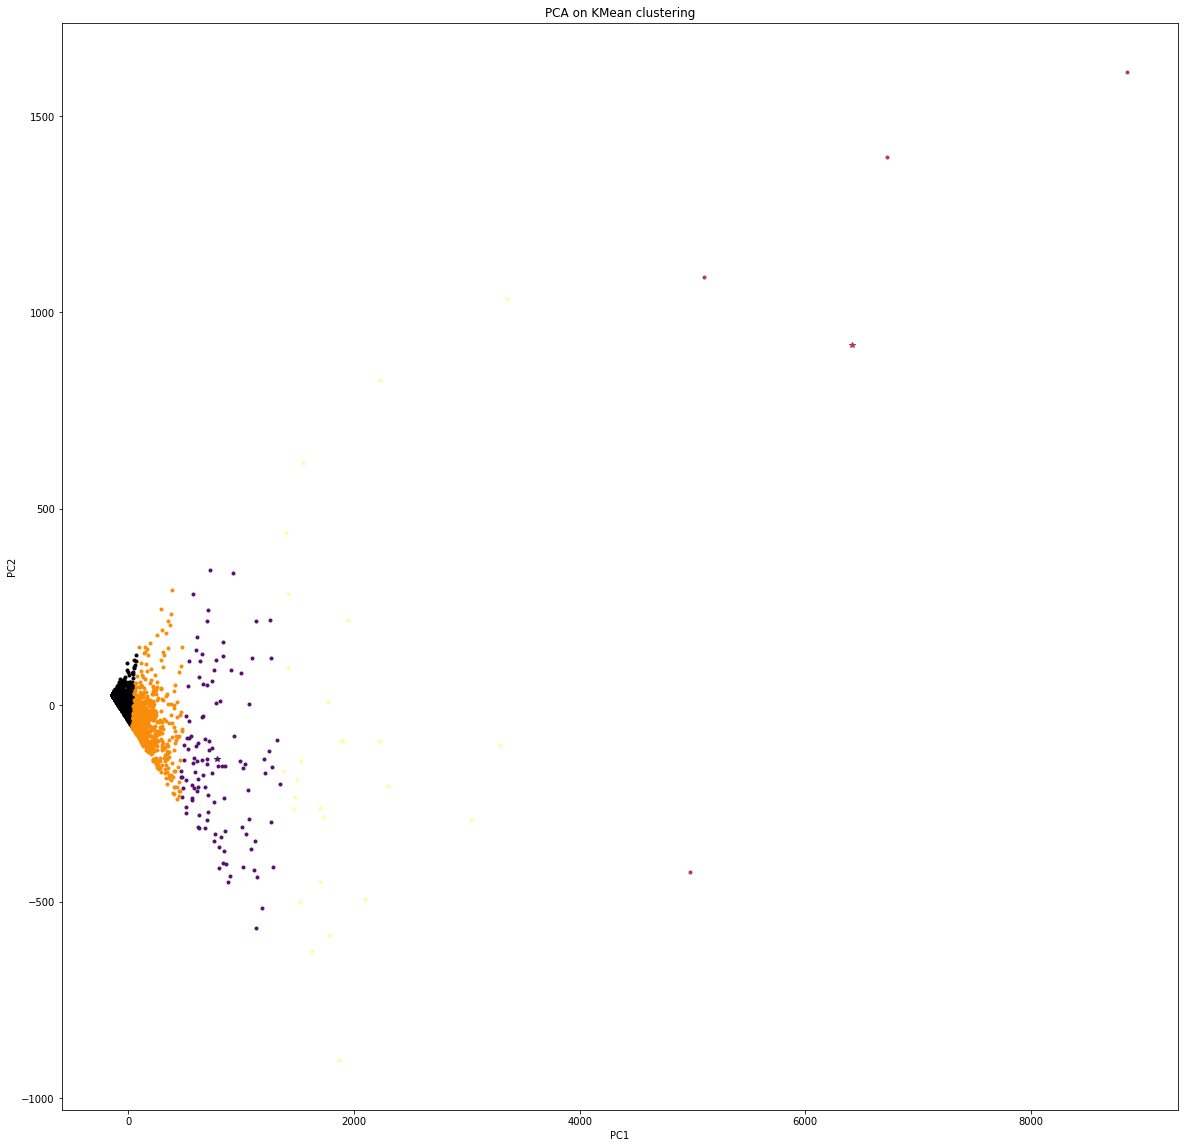

In [13]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set_title('PCA on KMean clustering')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
for cluster in kmean_clusters:
    ax.plot(kmean.cluster_centers_[cluster, 0], kmean.cluster_centers_[cluster, 1], marker='*', color=kmean_colormap[cluster])
    subset = reduced_data[reduced_data['pred_kmean'] == cluster]
    ax.scatter(subset.loc[:, 'pc1'], subset.loc[:, 'pc2'], marker='.', color=kmean_colormap[cluster])
    print(f'Cluster #{cluster} standard deviation: {subset.stack().std()} (n={subset.shape[0]})')
fig.show()